In [ ]:
  # Data inf0 - https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
# importing required libraires
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
x_train[1, 1]

array([[140, 160, 169],
       [145, 153, 154],
       [125, 125, 118],
       [124, 129, 132],
       [150, 161, 173],
       [152, 164, 175],
       [174, 188, 200],
       [178, 189, 196],
       [134, 139, 137],
       [110, 111, 102],
       [133, 127, 120],
       [163, 156, 156],
       [192, 192, 187],
       [218, 219, 215],
       [240, 241, 238],
       [245, 246, 245],
       [241, 242, 239],
       [238, 239, 235],
       [234, 235, 229],
       [226, 227, 220],
       [142, 143, 136],
       [ 96,  97,  85],
       [ 99, 101,  84],
       [ 95,  96,  87],
       [ 89,  89,  86],
       [ 80,  81,  77],
       [ 65,  67,  60],
       [ 84,  86,  76],
       [ 92,  95,  80],
       [ 96,  99,  78],
       [ 77,  80,  62],
       [ 71,  73,  61]], dtype=uint8)

In [ ]:
print(y_train.ndim)
print(y_test.ndim)

2
2


In [ ]:
y_train_reshape = y_train.reshape(-1, )        # why 1 dimension
y_test_reshape  = y_test.reshape(-1, )

print(y_train_reshape.ndim)
print(y_test_reshape.ndim)

1
1


In [ ]:
y_train_reshape[:25]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3,
       6, 6, 2], dtype=uint8)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train_reshape

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
y_test_reshape.shape

(10000,)

In [ ]:
classes =['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
classes[6]

'frog'

In [ ]:
classes[y_train[0][0]]

#TypeError: only integer scalar arrays can be converted to a scalar index


'frog'

In [ ]:
y_train[0][0]

np.uint8(6)

In [ ]:
y_train[0]

# 👉 Attribute = data or function inside a class/object

array([6], dtype=uint8)

In [ ]:
y_train[0].classes[0]

AttributeError: 'numpy.ndarray' object has no attribute 'classes'

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
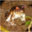

In [ ]:
x_train[0,:]

array([[[255, 255, 255],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[113, 120, 112],
        [111, 118, 111],
        [105, 112, 106],
        ...,
        [ 72,  81,  80],
        [ 72,  80,  79],
        [ 72,  80,  79]],

       [[111, 118, 110],
        [104, 111, 104],
        [ 99, 106,  98],
        ...,
        [ 68,  75,  73],
        [ 70,  76,  75],
        [ 78,  84,  82]],

       [[106, 113, 105],
        [ 99, 106,  98],
        [ 95, 102,  94],
        ...,
        [ 78,  85,  83],
        [ 79,  85,  83],
        [ 80,  86,  84]]], dtype=uint8)
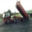

In [ ]:
 x_train[2,:]

In [ ]:
y_train[0]

array([6], dtype=uint8)

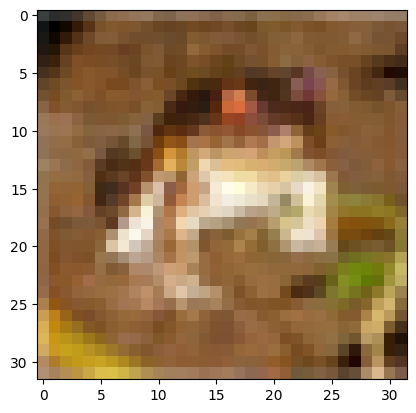

In [ ]:
  plt.imshow(x_train[0])

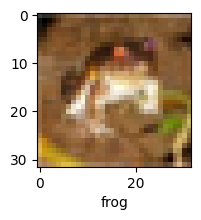

In [ ]:
plt.figure(figsize=(15,2))
plt.imshow(x_train[0])
plt.xlabel(classes[y_train[0][0]])
plt.show()

TypeError: only integer scalar arrays can be converted to a scalar index

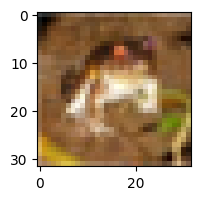

In [ ]:
plt.figure(figsize=(10,2))
plt.imshow(x_train[0])
plt.xlabel(classes[y_train[0]])
plt.show()

In [ ]:
# create function

def sample_img(x,y):
    rdm_img = random.randint(0, len(x))   # range a, b - including both a and b
    print(rdm_img)
    plt.figure(figsize=(15,2))
    plt.imshow(x[rdm_img])
    plt.xlabel(classes[y[rdm_img][0]])
    plt.show()


19570


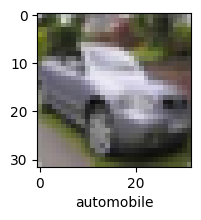

In [ ]:
sample_img(x_train, y_train)

In [ ]:
y_train[29263][0]

np.uint8(3)

In [ ]:
y_train[29263]

array([3], dtype=uint8)

In [ ]:
y_train[29263][1]

# IndexError: index 1 is out of bounds for axis 0 with size 1


IndexError: index 1 is out of bounds for axis 0 with size 1

9664


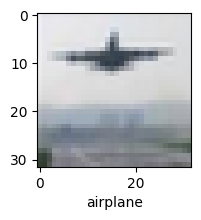

In [ ]:
# sample from testing data

sample_img(x_test, y_test)

8988


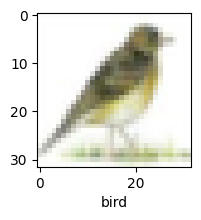

In [ ]:
sample_img(x_test, y_test)

In [ ]:
# Normalized data

x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train[1,:]

array([[[0.60392157, 0.69411765, 0.73333333],
        [0.49411765, 0.5372549 , 0.53333333],
        [0.41176471, 0.40784314, 0.37254902],
        ...,
        [0.35686275, 0.37254902, 0.27843137],
        [0.34117647, 0.35294118, 0.27843137],
        [0.30980392, 0.31764706, 0.2745098 ]],

       [[0.54901961, 0.62745098, 0.6627451 ],
        [0.56862745, 0.6       , 0.60392157],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.37647059, 0.38823529, 0.30588235],
        [0.30196078, 0.31372549, 0.24313725],
        [0.27843137, 0.28627451, 0.23921569]],

       [[0.54901961, 0.60784314, 0.64313725],
        [0.54509804, 0.57254902, 0.58431373],
        [0.45098039, 0.45098039, 0.43921569],
        ...,
        [0.30980392, 0.32156863, 0.25098039],
        [0.26666667, 0.2745098 , 0.21568627],
        [0.2627451 , 0.27058824, 0.21568627]],

       ...,

       [[0.68627451, 0.65490196, 0.65098039],
        [0.61176471, 0.60392157, 0.62745098],
        [0.60392157, 0

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),

    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
# Output class
# [dog, cat] - [0, 1] - binary classification - binary_crossentropy
# [dog, cat, duck] - [0, 0, 1] - categorical_crossentropy - one hot encoding
# [dog, cat, duck] - [0, 1, 2] - sparse_categorical_crossentropy

In [ ]:
# Backword Propogation

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, validation_split=0.2, epochs=20)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3546 - loss: 1.7571 - val_accuracy: 0.5699 - val_loss: 1.2345
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5832 - loss: 1.1722 - val_accuracy: 0.6177 - val_loss: 1.1045
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6423 - loss: 1.0200 - val_accuracy: 0.6325 - val_loss: 1.0452
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6731 - loss: 0.9344 - val_accuracy: 0.6546 - val_loss: 1.0089
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6953 - loss: 0.8728 - val_accuracy: 0.6646 - val_loss: 0.9774
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7227 - loss: 0.8086 - val_accuracy: 0.6653 - val_loss: 0.9952
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7371 - loss: 0.7519 - val_accuracy: 0.6847 - val_loss: 0.9395
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7537 - loss: 0.7037 -

In [ ]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6658 - loss: 1.2514


[1.278908371925354, 0.6664999723434448]

In [ ]:
y_pred = model.predict(x_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[4.2722695e-05, 5.2445716e-07, 1.1790512e-03, ..., 1.0787597e-05,
        4.1198820e-01, 2.0290857e-08],
       [1.9354662e-05, 9.7452831e-01, 3.1210454e-10, ..., 5.7926476e-14,
        2.5386462e-02, 6.5887383e-05],
       [2.2433518e-01, 7.0993769e-01, 2.0966322e-04, ..., 1.8488136e-05,
        4.3021291e-02, 2.2252316e-02],
       ...,
       [3.1648942e-06, 1.2757368e-13, 6.5754954e-05, ..., 1.5072488e-04,
        1.6157808e-08, 2.0658840e-10],
       [5.1634248e-02, 7.2628362e-03, 2.7253018e-03, ..., 2.7765084e-08,
        2.7291277e-05, 1.0143918e-05],
       [3.6274003e-10, 1.7622767e-12, 1.9891998e-07, ..., 9.9997187e-01,
        1.2592744e-12, 2.1770266e-12]], dtype=float32)

In [ ]:
y_pred.shape

(10000, 10)

In [ ]:
y_pred_df= pd.DataFrame(y_pred, columns=classes)
y_pred_df.head()

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
0,4.272270e-05,5.244572e-07,1.179051e-03,4.657468e-01,2.446644e-04,9.974466e-02,2.104266e-02,1.078760e-05,4.119882e-01,2.029086e-08
1,1.935466e-05,9.745283e-01,3.121045e-10,1.943519e-11,4.524835e-12,2.444466e-11,3.095615e-15,5.792648e-14,2.538646e-02,6.588738e-05
2,2.243352e-01,7.099377e-01,2.096632e-04,2.158972e-04,3.291922e-06,6.021689e-06,1.608156e-07,1.848814e-05,4.302129e-02,2.225232e-02
3,9.562730e-01,4.291215e-03,2.405610e-03,3.389302e-04,9.873841e-04,2.481013e-07,4.289414e-06,5.578768e-07,3.564318e-02,5.548710e-05
4,4.569950e-09,1.001297e-09,1.466110e-04,1.036717e-03,6.457953e-01,5.644686e-05,3.529644e-01,5.977957e-07,3.882640e-09,3.548746e-11


In [ ]:
pd.DataFrame(y_train)

,0
0,6
1,9
2,9
3,4
4,1
...,...
49995,2
49996,6
49997,9
49998,1


In [ ]:
pd.DataFrame(y_test)

,0
0,3
1,8
2,8
3,0
4,6
...,...
9995,8
9996,3
9997,5
9998,1


In [ ]:
y_pred.shape

(10000, 10)

In [ ]:
y_pred[1]

array([1.9354662e-05, 9.7452831e-01, 3.1210454e-10, 1.9435191e-11,
       4.5248354e-12, 2.4444656e-11, 3.0956153e-15, 5.7926476e-14,
       2.5386462e-02, 6.5887383e-05], dtype=float32)

In [ ]:
y_class= [np.argmax(i) for i in y_pred]
y_class

[np.int64(3),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(4),
 np.int64(6),
 np.int64(9),
 np.int64(6),
 np.int64(3),
 np.int64(1),
 np.int64(0),
 np.int64(9),
 np.int64(3),
 np.int64(7),
 np.int64(9),
 np.int64(8),
 np.int64(5),
 np.int64(3),
 np.int64(8),
 np.int64(6),
 np.int64(7),
 np.int64(2),
 np.int64(2),
 np.int64(9),
 np.int64(4),
 np.int64(4),
 np.int64(7),
 np.int64(0),
 np.int64(7),
 np.int64(6),
 np.int64(6),
 np.int64(2),
 np.int64(4),
 np.int64(5),
 np.int64(7),
 np.int64(8),
 np.int64(4),
 np.int64(9),
 np.int64(9),
 np.int64(5),
 np.int64(4),
 np.int64(6),
 np.int64(5),
 np.int64(6),
 np.int64(0),
 np.int64(9),
 np.int64(5),
 np.int64(3),
 np.int64(7),
 np.int64(4),
 np.int64(7),
 np.int64(8),
 np.int64(6),
 np.int64(3),
 np.int64(8),
 np.int64(8),
 np.int64(7),
 np.int64(7),
 np.int64(5),
 np.int64(2),
 np.int64(7),
 np.int64(5),
 np.int64(6),
 np.int64(5),
 np.int64(6),
 np.int64(2),
 np.int64(1),
 np.int64(2),
 np.int64(5),
 np.int64(8),
 np.int64(2),
 np.in

In [ ]:
y_class[:10]

[np.int64(3),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(4),
 np.int64(6),
 np.int64(9),
 np.int64(6),
 np.int64(3),
 np.int64(1)]

In [ ]:
y_class[1]

np.int64(1)

In [ ]:
y_class = [np.argmax(ele) for ele in y_pred]

In [ ]:
y_class[:10]

[np.int64(3),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(4),
 np.int64(6),
 np.int64(9),
 np.int64(6),
 np.int64(3),
 np.int64(1)]

In [ ]:
y_class[1]

np.int64(1)

In [ ]:
y_class = [argmax(ele) for ele in y_pred]

NameError: name 'argmax' is not defined

In [ ]:
y_class = [np.argmax(ele) for ele in y_pred_df]
y_class

# Argmax is used to convert model probability outputs into final class predictions.
# Argmax selects the most probable class.
# Argmax finds where the maximum value is, not the value itself.
# Argmax is an operation that returns the index (position) of the maximum value in a vector, matrix, or tensor.

[np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0)]

In [ ]:
for i in y_pred:
   y_class1=max(i)
   print(y_class1)

0.46574676
0.9745283
0.7099377
0.956273
0.6457953
0.99936974
0.9877488
0.8984376
0.9856525
0.99948883
0.973722
0.9997229
0.5283844
0.9999877
0.9999968
0.99947476
0.9981985
0.7578832
0.9999124
0.9816466
0.7662055
0.9840709
0.8396799
0.99999976
0.98178256
0.9781089
0.71809816
0.49612972
0.463501
0.9999025
0.91984415
0.32544115
0.8745498
0.8572458
0.6549166
0.5915358
0.59583414
0.7184621
1.0
0.9877023
0.7423912
0.9999857
0.9853993
0.74847984
0.9990433
0.99842995
0.6107967
0.9165609
0.9591555
0.46532488
0.28414756
0.98156357
0.7220595
0.7742792
0.9981744
0.99895775
0.82754594
0.69787043
0.46940258
0.5161296
0.97592443
0.7427375
0.87226987
0.3661221
0.92301077
0.9867823
0.9977556
0.9733481
0.8022031
0.5882137
0.8873758
0.9733574
0.9999981
0.99999917
0.77683395
0.9986878
0.7798968
0.44377008
0.98734516
0.9999939
0.99941856
0.7199229
0.9988348
0.94139534
0.3866097
0.75318444
0.65137297
0.8435259
0.9854295
0.9998189
0.69189227
0.37957272
0.9925098
0.68130875
0.9821583
0.98494846
0.99849284
0.9

In [ ]:
y_class1[:10]

IndexError: invalid index to scalar variable.

In [ ]:
for i in y_pred:
   y_class1=np.argmax(i)
   print(y_class1)
   print(y_class1[:, 10])

3


IndexError: invalid index to scalar variable.

In [ ]:
y_class1[10]

IndexError: invalid index to scalar variable.

In [ ]:
y_class = [np.argmax(ele) for ele in y_pred]
y_class

[np.int64(3),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(4),
 np.int64(6),
 np.int64(9),
 np.int64(6),
 np.int64(3),
 np.int64(1),
 np.int64(0),
 np.int64(9),
 np.int64(3),
 np.int64(7),
 np.int64(9),
 np.int64(8),
 np.int64(5),
 np.int64(3),
 np.int64(8),
 np.int64(6),
 np.int64(7),
 np.int64(2),
 np.int64(2),
 np.int64(9),
 np.int64(4),
 np.int64(4),
 np.int64(7),
 np.int64(0),
 np.int64(7),
 np.int64(6),
 np.int64(6),
 np.int64(2),
 np.int64(4),
 np.int64(5),
 np.int64(7),
 np.int64(8),
 np.int64(4),
 np.int64(9),
 np.int64(9),
 np.int64(5),
 np.int64(4),
 np.int64(6),
 np.int64(5),
 np.int64(6),
 np.int64(0),
 np.int64(9),
 np.int64(5),
 np.int64(3),
 np.int64(7),
 np.int64(4),
 np.int64(7),
 np.int64(8),
 np.int64(6),
 np.int64(3),
 np.int64(8),
 np.int64(8),
 np.int64(7),
 np.int64(7),
 np.int64(5),
 np.int64(2),
 np.int64(7),
 np.int64(5),
 np.int64(6),
 np.int64(5),
 np.int64(6),
 np.int64(2),
 np.int64(1),
 np.int64(2),
 np.int64(5),
 np.int64(8),
 np.int64(2),
 np.in

In [ ]:
Scores = [0.1, 0.7, 0.2, 11, 244]
np.argmax(Scores)

np.int64(4)

In [ ]:
max(y_pred[1])

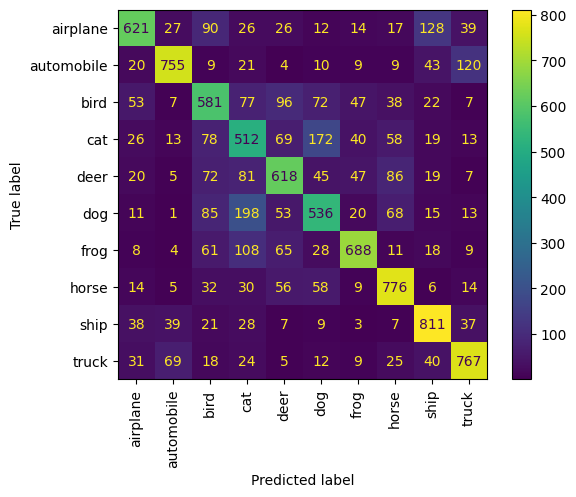

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cm= ConfusionMatrixDisplay.from_predictions(y_test, y_class, display_labels=classes, xticks_rotation='vertical')

In [ ]:
def validate_rdm_img():
  plt.figure(figsize=(15,2))
  rdm_img = random.randint(0, len(x_test))
  print(rdm_img)
  plt.imshow(x_test[rdm_img, :])
  plt.show()

  print('Actual Image :', classes[y_test[rdm_img][0]])
  print('Predicted Image :', classes[y_class[rdm_img]])
  print('Predicted highest Probability:', round(y_pred[rdm_img][y_class[rdm_img]],2))

3346


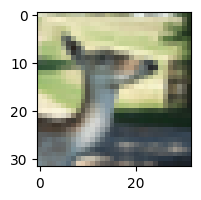

Actual Image : deer
Predicted Image : airplane
Predicted highest Probability: 0.83


In [ ]:
validate_rdm_img()

In [ ]:
rdm_img = random.randint(0, len(x_test))
print(rdm_img)
round(y_pred[rdm_img][y_class[rdm_img]],2)

2820


np.float32(0.99)

In [ ]:
y_pred[7916]

array([1.1101380e-03, 2.3569280e-07, 1.2791841e-02, 2.2798678e-04,
       4.9434987e-01, 4.8937979e-01, 1.8306720e-03, 3.0923853e-04,
       2.8185634e-09, 2.2955989e-07], dtype=float32)

In [ ]:
y_class[7916]

np.int64(4)

In [ ]:
y_pred[7916][y_class[7916]]

np.float32(0.49434987)

In [ ]:
y_pred[rdm_img]

array([1.2869369e-08, 4.5941506e-10, 7.3975906e-07, 3.6827664e-06,
       6.0423375e-03, 1.6218704e-05, 9.9393702e-01, 1.8951543e-08,
       9.9228160e-12, 1.7080152e-09], dtype=float32)

In [ ]:
Index of maximum value

select the final class in classification problems.
used after model prediction